In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X = train[['LotArea', 'BedroomAbvGr', 'FullBath']]
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse}")

X_test = test[['LotArea', 'BedroomAbvGr', 'FullBath']]
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

test['Price'] = predictions
test.to_csv("test_with_predictions.csv", index=False)
print("Predictions saved as 'test_with_predictions.csv'")

print(f"Formatted Mean Squared Error: {mse:.2f}")


Saving train.csv to train (9).csv
Saving test.csv to test (9).csv
MSE: 4831659711.845767
Predictions saved as 'test_with_predictions.csv'
Formatted Mean Squared Error: 4831659711.85


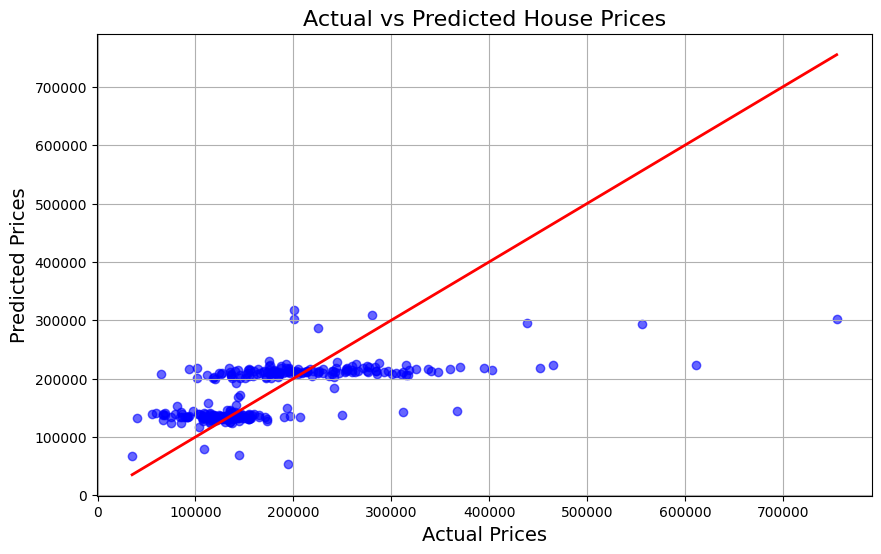

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', lw=2)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title('Actual vs Predicted House Prices', fontsize=16)
plt.grid(True)
plt.show()


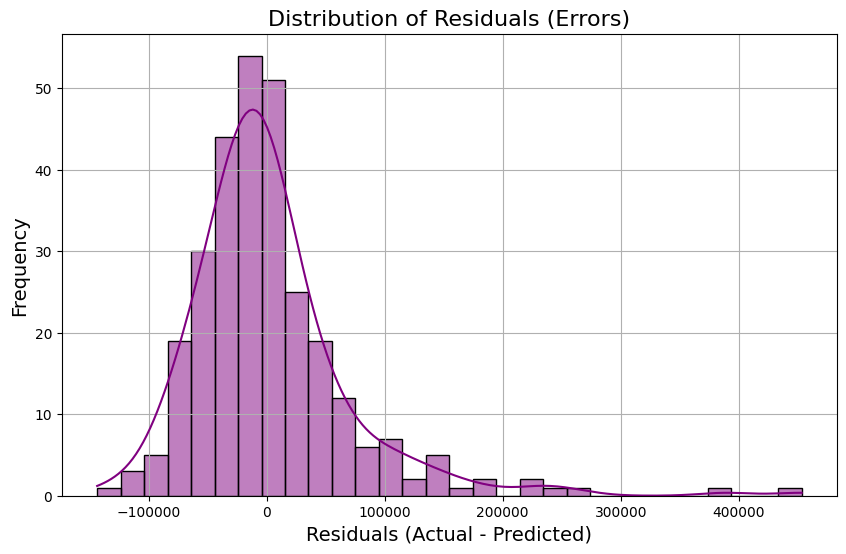

In [ ]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribution of Residuals (Errors)', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


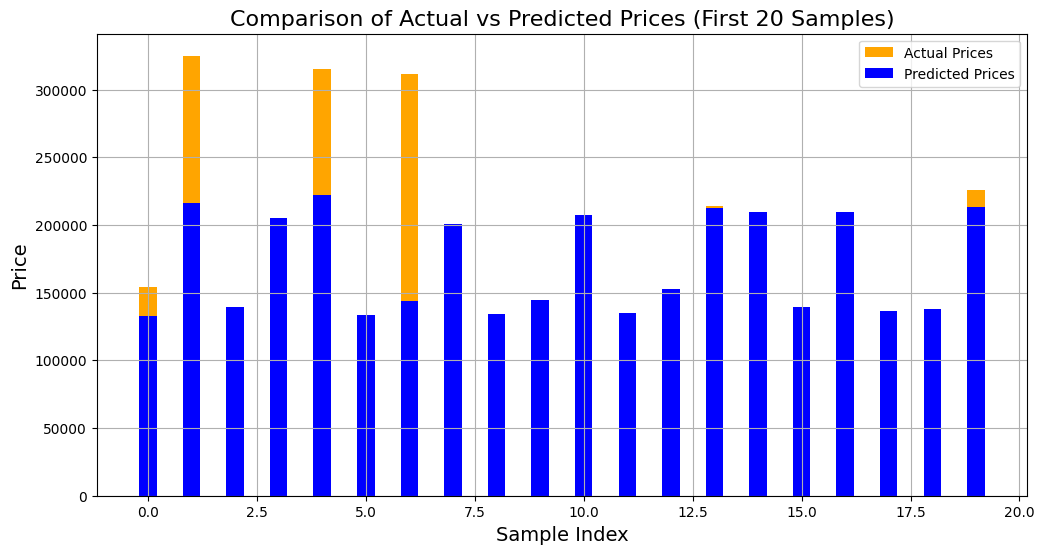

In [ ]:
plt.figure(figsize=(12, 6))
indices = range(20)
plt.bar(indices, y_val[:20], 0.4, label='Actual Prices', color='orange')
plt.bar(indices, y_pred[:20], 0.4, label='Predicted Prices', color='blue')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Comparison of Actual vs Predicted Prices (First 20 Samples)', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
